In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import scipy.stats as stats

#import packages

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


## map wells to genotype (DHFR-tagged strains)

In [2]:
validations_df = pd.read_csv('./validation_mutants_df_v3.csv', sep=',', index_col=0)
# DMS, ddG and evolutionnary annotations for validation variants
# The indexes for mutants in both dataframes (DMS and validations) will match
validations_df

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,interface,ddG_struc_HET,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site
136,8,S,F,-1.111151,-0.922339,0.415623,-1.299963,0.276321,-4.373589,-4.495269,...,0.00,-2.33217,-4.59949,0.00120,0.00162,1.7803,0.192308,14.804167,0.000000,17.106971
168,10,W,*,-0.136679,-0.322614,0.504528,0.049255,0.105939,1.184129,1.158049,...,0.00,NaN,NaN,NaN,NaN,1.0380,0.196970,18.152143,NaN,15.447535
227,12,Q,K,0.769357,1.416442,1.857860,0.122271,0.298271,-1.133104,-1.532682,...,0.00,0.38653,0.80766,0.00000,0.00000,2.5190,0.563084,18.455000,0.213270,15.664775
261,14,G,W,-3.128267,-2.879006,0.000000,-3.377528,0.000000,1.131018,1.272348,...,0.00,61.33926,110.37500,0.00000,0.00006,-0.0995,0.000000,10.426250,0.004717,11.052810
263,14,G,Y,-4.292014,-3.590963,1.042929,-4.993065,0.434378,-1.111130,-1.142447,...,0.00,51.91922,95.60872,0.00000,0.00000,-0.0995,0.000000,10.426250,0.009434,11.052810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,155,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,3.98187,7.58297,-0.01388,-0.22324,-0.9460,0.008021,8.413750,0.009479,0.000000
3249,156,I,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1.89760,3.69370,0.24268,0.07604,-0.8920,0.082051,10.215625,0.000000,1.328411
3250,156,I,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,3.51328,6.84207,0.18452,0.36770,-0.8920,0.082051,10.215625,0.004739,1.328411
3274,157,G,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,17.12332,35.22290,11.10460,23.37869,-0.6409,0.020619,10.876250,0.000000,3.428099


In [3]:
first_round = [136, 261, 263, 345, 350, 429, 439, 455, 514, 575, 582, 681, 723, 744, 745, 770, 787, 788, 1023, 1161, 1170, 1205, 1206, 1208, 1213, 1228, 1236, 1249, 1333, 1350, 1410, 1451,
                      1460, 1527, 1551, 1560, 1563, 1565, 1568, 1570, 1642, 1770, 1778, 1830, 1854, 1877, 1897, 1910, 1915, 1921, 1980, 1983, 1990, 2004, 2020, 2189, 2298, 2434, 2435, 2445, 2467, 
                      2534, 2536, 2628, 2760, 2900, 2918, 2936, 2967, 3092, 3096, 3118, 3144, 3147, 3156, 3208, 3249, 3250, 3274, 3275]

In [4]:
mutant_indexes = list([ x for x in validations_df.index if x in first_round])
# list of df index for the validation mutants
len(mutant_indexes)

80

In [5]:

primer_position_dict = {}

index_pos = 0

for col in range(1,11):
    
    for row in ['A','B', 'C', 'D', 'E', 'F', 'G', 'H']:
        
        primer_position_dict[mutant_indexes[index_pos]] = row+str(col)
        
        index_pos+=1
        
primer_position_dict
        
# variants are ordered according to ther DMS dataframe index, so we can directly
# map their position to the fusion PCR oligo plates

{136: 'A1',
 261: 'B1',
 263: 'C1',
 345: 'D1',
 350: 'E1',
 429: 'F1',
 439: 'G1',
 455: 'H1',
 514: 'A2',
 575: 'B2',
 582: 'C2',
 681: 'D2',
 723: 'E2',
 744: 'F2',
 745: 'G2',
 770: 'H2',
 787: 'A3',
 788: 'B3',
 1023: 'C3',
 1161: 'D3',
 1170: 'E3',
 1205: 'F3',
 1206: 'G3',
 1208: 'H3',
 1213: 'A4',
 1228: 'B4',
 1236: 'C4',
 1249: 'D4',
 1333: 'E4',
 1350: 'F4',
 1410: 'G4',
 1451: 'H4',
 1460: 'A5',
 1527: 'B5',
 1551: 'C5',
 1560: 'D5',
 1563: 'E5',
 1565: 'F5',
 1568: 'G5',
 1570: 'H5',
 1642: 'A6',
 1770: 'B6',
 1778: 'C6',
 1830: 'D6',
 1854: 'E6',
 1877: 'F6',
 1897: 'G6',
 1910: 'H6',
 1915: 'A7',
 1921: 'B7',
 1980: 'C7',
 1983: 'D7',
 1990: 'E7',
 2004: 'F7',
 2020: 'G7',
 2189: 'H7',
 2298: 'A8',
 2434: 'B8',
 2435: 'C8',
 2445: 'D8',
 2467: 'E8',
 2534: 'F8',
 2536: 'G8',
 2628: 'H8',
 2760: 'A9',
 2900: 'B9',
 2918: 'C9',
 2936: 'D9',
 2967: 'E9',
 3092: 'F9',
 3096: 'G9',
 3118: 'H9',
 3144: 'A10',
 3147: 'B10',
 3156: 'C10',
 3208: 'D10',
 3249: 'E10',
 3250: 'F10'

In [6]:
rearray_96_dict = {}

well_index = 0

for col in range(1,12):
    
    for row in ['A','B', 'C', 'D', 'E', 'F', 'G']:
        
        rearray_96_dict[well_index] = row+str(col)
        
        well_index+=1
        
#rearray_96_dict
# this dictionnary converts the coordinates of oligos in a 96 well plate to the corresponding position in a 7x11
# array

In [7]:
plate_96w_position_dict = {}


used_for_wt = ['A1', 'F7']
dropped = ['D3', 'B5', 'A10']

pos_mod = 0
#ajusts plate position for dropped strains

for mutant in mutant_indexes:
    
    mutant_no = mutant_indexes.index(mutant)
    
    if primer_position_dict[mutant] in used_for_wt:
        plate_96w_position_dict[mutant] = np.nan
    
    
    elif primer_position_dict[mutant] in dropped:
        plate_96w_position_dict[mutant] = np.nan
        pos_mod +=1
        
    else:
        plate_96w_position_dict[mutant] = rearray_96_dict[mutant_no-pos_mod]
        
plate_96w_position_dict
# looks good based on printed values        
# adds the information of which strains could successfully be constructed to map mutants to the 7x11 array
        
        
#for mut in mutant_indexes:
#    print(primer_position_dict[mut], plate_96w_position_dict[mut])
    # printed values match the plan in my lab notebook      
        

{136: nan,
 261: 'B1',
 263: 'C1',
 345: 'D1',
 350: 'E1',
 429: 'F1',
 439: 'G1',
 455: 'A2',
 514: 'B2',
 575: 'C2',
 582: 'D2',
 681: 'E2',
 723: 'F2',
 744: 'G2',
 745: 'A3',
 770: 'B3',
 787: 'C3',
 788: 'D3',
 1023: 'E3',
 1161: nan,
 1170: 'F3',
 1205: 'G3',
 1206: 'A4',
 1208: 'B4',
 1213: 'C4',
 1228: 'D4',
 1236: 'E4',
 1249: 'F4',
 1333: 'G4',
 1350: 'A5',
 1410: 'B5',
 1451: 'C5',
 1460: 'D5',
 1527: nan,
 1551: 'E5',
 1560: 'F5',
 1563: 'G5',
 1565: 'A6',
 1568: 'B6',
 1570: 'C6',
 1642: 'D6',
 1770: 'E6',
 1778: 'F6',
 1830: 'G6',
 1854: 'A7',
 1877: 'B7',
 1897: 'C7',
 1910: 'D7',
 1915: 'E7',
 1921: 'F7',
 1980: 'G7',
 1983: 'A8',
 1990: 'B8',
 2004: nan,
 2020: 'D8',
 2189: 'E8',
 2298: 'F8',
 2434: 'G8',
 2435: 'A9',
 2445: 'B9',
 2467: 'C9',
 2534: 'D9',
 2536: 'E9',
 2628: 'F9',
 2760: 'G9',
 2900: 'A10',
 2918: 'B10',
 2936: 'C10',
 2967: 'D10',
 3092: 'E10',
 3096: 'F10',
 3118: 'G10',
 3144: nan,
 3147: 'A11',
 3156: 'B11',
 3208: 'C11',
 3249: 'D11',
 3250: 'E11

In [8]:
mtx_row_dict = {'A':'B',
                'B':'D',
                'C':'F',
                'D':'H',
                'E':'J',
                'F':'L',
                'G':'N'}
dmso_row_dict = {'A':'C',
                 'B':'E',
                 'C':'G',
                 'D':'I',
                 'E':'K',
                 'F':'M',
                 'G':'O'}
# converts the 7x11 rows of the variant array to the corresponding rows in the 384. The positions are shifted to
# allow for a water border on the edge of the plate, to limit the effect of evaporation.

In [9]:


plate_384_mtx_1_position_dict = {}

for mutant in mutant_indexes:   
    if isinstance(plate_96w_position_dict[mutant], str) == False:
        plate_384_mtx_1_position_dict[mutant] = np.NaN
        
    else:
        mutant_row = plate_96w_position_dict[mutant][0]
        mutant_col = int(plate_96w_position_dict[mutant][1:])
        
        plate_384_mtx_1_position_dict[mutant] = mtx_row_dict[mutant_row]+str((mutant_col*2))       
        
#plate_384_mtx_1_position_dict
#positions of variants for replicate 1, MTX media

In [10]:
plate_384_mtx_2_position_dict = {}

for mutant in mutant_indexes:   
    if isinstance(plate_96w_position_dict[mutant], str) == False:
        plate_384_mtx_2_position_dict[mutant] = np.NaN
        
    else:
        mutant_row = plate_96w_position_dict[mutant][0]
        mutant_col = int(plate_96w_position_dict[mutant][1:])
        
        plate_384_mtx_2_position_dict[mutant] = mtx_row_dict[mutant_row]+str(((mutant_col*2)+1))
#plate_384_mtx_2_position_dict
#positions of variants for replicate 2, MTX media

In [11]:
plate_384_dmso_1_position_dict = {}

for mutant in mutant_indexes:   
    if isinstance(plate_96w_position_dict[mutant], str) == False:
        plate_384_dmso_1_position_dict[mutant] = np.NaN
        
    else:
        mutant_row = plate_96w_position_dict[mutant][0]
        mutant_col = int(plate_96w_position_dict[mutant][1:])
        
        plate_384_dmso_1_position_dict[mutant] = dmso_row_dict[mutant_row]+str(((mutant_col*2)))
#plate_384_dmso_1_position_dict
#positions of variants for replicate 1, DMSO media

In [12]:
plate_384_dmso_2_position_dict = {}

for mutant in mutant_indexes:   
    if isinstance(plate_96w_position_dict[mutant], str) == False:
        plate_384_dmso_2_position_dict[mutant] = np.NaN
        
    else:
        mutant_row = plate_96w_position_dict[mutant][0]
        mutant_col = int(plate_96w_position_dict[mutant][1:])
        
        plate_384_dmso_2_position_dict[mutant] = dmso_row_dict[mutant_row]+str(((mutant_col*2)+1))
#plate_384_dmso_2_position_dict
#positions of variants for replicate 2, DMSO media

## Add growth curve plate position in the dataframe

In [13]:
validations_df['primer_position'] = pd.Series(primer_position_dict)
validations_df['plate_96w_position'] = pd.Series(plate_96w_position_dict)
validations_df['mtx1_position'] = pd.Series(plate_384_mtx_1_position_dict)
validations_df['mtx2_position'] = pd.Series(plate_384_mtx_2_position_dict)
validations_df['dmso1_position'] = pd.Series(plate_384_dmso_1_position_dict)
validations_df['dmso2_position'] = pd.Series(plate_384_dmso_2_position_dict)




validations_df

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,RSA,temp,ortholog_aa_freq,dist_act_site,primer_position,plate_96w_position,mtx1_position,mtx2_position,dmso1_position,dmso2_position
136,8,S,F,-1.111151,-0.922339,0.415623,-1.299963,0.276321,-4.373589,-4.495269,...,0.192308,14.804167,0.000000,17.106971,A1,NaN,NaN,NaN,NaN,NaN
168,10,W,*,-0.136679,-0.322614,0.504528,0.049255,0.105939,1.184129,1.158049,...,0.196970,18.152143,NaN,15.447535,NaN,NaN,NaN,NaN,NaN,NaN
227,12,Q,K,0.769357,1.416442,1.857860,0.122271,0.298271,-1.133104,-1.532682,...,0.563084,18.455000,0.213270,15.664775,NaN,NaN,NaN,NaN,NaN,NaN
261,14,G,W,-3.128267,-2.879006,0.000000,-3.377528,0.000000,1.131018,1.272348,...,0.000000,10.426250,0.004717,11.052810,B1,B1,D2,D3,E2,E3
263,14,G,Y,-4.292014,-3.590963,1.042929,-4.993065,0.434378,-1.111130,-1.142447,...,0.000000,10.426250,0.009434,11.052810,C1,C1,F2,F3,G2,G3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,155,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008021,8.413750,0.009479,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3249,156,I,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082051,10.215625,0.000000,1.328411,E10,D11,H22,H23,I22,I23
3250,156,I,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082051,10.215625,0.004739,1.328411,F10,E11,J22,J23,K22,K23
3274,157,G,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020619,10.876250,0.000000,3.428099,G10,F11,L22,L23,M22,M23


In [14]:
validations_df.columns
# check if new columns are all there

Index(['codon', 'wt', 'measured', 'CY_1', 'CY_1_R1', 'CY_1_MAD_1', 'CY_1_R2',
       'CY_1_MAD_2', 'FC_1', 'FC_1_R1', 'FC_1_MAD_1', 'FC_1_R2', 'FC_1_MAD_2',
       'CY_2', 'CY_2_R1', 'CY_2_MAD_1', 'CY_2_R2', 'CY_2_MAD_2', 'FC_2',
       'FC_2_R1', 'FC_2_MAD_1', 'FC_2_R2', 'FC_2_MAD_2', 'FC_CY_2',
       'FC_CY_2_R1', 'FC_CY_2_MAD_1', 'FC_CY_2_R2', 'FC_CY_2_MAD_2', 'CY_3',
       'CY_3_R1', 'CY_3_MAD_1', 'CY_3_R2', 'CY_3_MAD_2', 'FC_3', 'FC_3_R1',
       'FC_3_MAD_1', 'FC_3_R2', 'FC_3_MAD_2', 'CY_1_to_2', 'CY_3_to_2',
       'FC_1_to_2', 'FC_3_to_2', 'CY_123', 'FC_123', 'CY_score', 'FC_score',
       'FC_CY_score', 'interface', 'ddG_struc_HET', 'ddG_struc_HM',
       'ddG_inter_HET', 'ddG_inter_HM', 'r4s_score', 'RSA', 'temp',
       'ortholog_aa_freq', 'dist_act_site', 'primer_position',
       'plate_96w_position', 'mtx1_position', 'mtx2_position',
       'dmso1_position', 'dmso2_position'],
      dtype='object')

## Define function to measure derivative growth rate

In [15]:
def get_derivative_growth_rate(well, df, tmax=25):
    # well : a tuple of the format (row, col)
    # source : DataFrame where well was measured
    # tmax : defines the interval in which the function will measure the growth rate, from t=0 to t=tmax
    
    df_cols = [ x for x in list(df.index) if x<=tmax]
    # define time range
    
    df_data = df.loc[df_cols]
    # select the subset of the DataFrame in the selected timerange
    data = df_data[(well[0]+str(well[1]))]
    # 

    data_diff = data.diff()*4
    
    get_top_5 = data_diff.nlargest(5)
    
    growth_rate = np.median(get_top_5)
    std_err = np.std(get_top_5)
    
    return growth_rate, std_err

## get PPI growth rates

In [16]:
MTX_source_table = './validationsmtx384FCY1.xlsx'

In [17]:
MTX_source_df = pd.read_excel(MTX_source_table, header=0, nrows=384, index_col=0)

MTX_source_df.head()

,0s,900s,1800s,2699s,3599s,4499s,5399s,6299s,7199s,8099s,...,250185s,251085s,251985s,252885s,253785s,254685s,255585s,256485s,257385s,258285s
A1,0.095589,0.095128,0.094868,0.094764,0.094723,0.094714,0.094529,0.094543,0.094411,0.094230,...,0.093680,0.093899,0.093791,0.093803,0.093867,0.093662,0.093698,0.093661,0.093745,0.093646
A2,0.096706,0.096245,0.095912,0.095766,0.095713,0.095656,0.095506,0.095525,0.095387,0.095213,...,0.094875,0.094980,0.094861,0.094935,0.095068,0.094833,0.094903,0.094910,0.094971,0.094854
A3,0.098366,0.097993,0.097509,0.097363,0.097303,0.097168,0.096952,0.097047,0.096810,0.096694,...,0.096354,0.096500,0.096349,0.096456,0.096443,0.096330,0.096442,0.096425,0.096475,0.096399
A4,0.098503,0.098177,0.097600,0.097784,0.097661,0.097324,0.097425,0.097531,0.097285,0.097152,...,0.096906,0.096977,0.096885,0.096887,0.096840,0.096757,0.096838,0.096824,0.096918,0.096790
A5,0.096659,0.096284,0.095846,0.095650,0.095631,0.095505,0.095305,0.095388,0.095131,0.095008,...,0.094509,0.094718,0.094633,0.094681,0.094594,0.094618,0.094672,0.094693,0.094698,0.094482


In [18]:
rename_dict = {}


for col_name in MTX_source_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
MTX_source_df.rename(columns = rename_dict, inplace=True)

MTX_source_df.head()

,0.000000,0.250000,0.500000,0.749722,0.999722,1.249722,1.499722,1.749722,1.999722,2.249722,...,69.495833,69.745833,69.995833,70.245833,70.495833,70.745833,70.995833,71.245833,71.495833,71.745833
A1,0.095589,0.095128,0.094868,0.094764,0.094723,0.094714,0.094529,0.094543,0.094411,0.094230,...,0.093680,0.093899,0.093791,0.093803,0.093867,0.093662,0.093698,0.093661,0.093745,0.093646
A2,0.096706,0.096245,0.095912,0.095766,0.095713,0.095656,0.095506,0.095525,0.095387,0.095213,...,0.094875,0.094980,0.094861,0.094935,0.095068,0.094833,0.094903,0.094910,0.094971,0.094854
A3,0.098366,0.097993,0.097509,0.097363,0.097303,0.097168,0.096952,0.097047,0.096810,0.096694,...,0.096354,0.096500,0.096349,0.096456,0.096443,0.096330,0.096442,0.096425,0.096475,0.096399
A4,0.098503,0.098177,0.097600,0.097784,0.097661,0.097324,0.097425,0.097531,0.097285,0.097152,...,0.096906,0.096977,0.096885,0.096887,0.096840,0.096757,0.096838,0.096824,0.096918,0.096790
A5,0.096659,0.096284,0.095846,0.095650,0.095631,0.095505,0.095305,0.095388,0.095131,0.095008,...,0.094509,0.094718,0.094633,0.094681,0.094594,0.094618,0.094672,0.094693,0.094698,0.094482


In [19]:
MTX_source_df=MTX_source_df.T

MTX_source_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0.000000,0.095589,0.096706,0.098366,0.098503,0.096659,0.097611,0.097852,0.095522,0.099376,0.096738,...,0.097820,0.096801,0.096886,0.098186,0.097967,0.098217,0.098597,0.097094,0.097017,0.097519
0.250000,0.095128,0.096245,0.097993,0.098177,0.096284,0.097336,0.097765,0.095395,0.099204,0.096586,...,0.098260,0.097286,0.097560,0.098834,0.098593,0.098459,0.099281,0.097815,0.097606,0.097942
0.500000,0.094868,0.095912,0.097509,0.097600,0.095846,0.096934,0.097460,0.095050,0.098704,0.096207,...,0.098067,0.097185,0.097567,0.098736,0.098657,0.098443,0.099274,0.097645,0.097562,0.098115
0.749722,0.094764,0.095766,0.097363,0.097784,0.095650,0.096745,0.097277,0.094822,0.098460,0.095992,...,0.097937,0.097016,0.097410,0.098469,0.098405,0.098423,0.098973,0.097513,0.097408,0.098013
0.999722,0.094723,0.095713,0.097303,0.097661,0.095631,0.096805,0.097297,0.094838,0.098510,0.096033,...,0.097910,0.097027,0.097332,0.098604,0.098404,0.098434,0.098942,0.097502,0.097411,0.097875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70.745833,0.093662,0.094833,0.096330,0.096757,0.094618,0.095818,0.096673,0.094283,0.097649,0.095046,...,0.097049,0.096466,0.096656,0.097392,0.097633,0.097392,0.097809,0.096591,0.096272,0.096727
70.995833,0.093698,0.094903,0.096442,0.096838,0.094672,0.095802,0.096678,0.094247,0.097666,0.095027,...,0.096922,0.096414,0.096599,0.097295,0.097604,0.097290,0.097723,0.096507,0.096237,0.096592
71.245833,0.093661,0.094910,0.096425,0.096824,0.094693,0.095848,0.096649,0.094239,0.097638,0.095034,...,0.096964,0.096518,0.096680,0.097457,0.097622,0.097259,0.097840,0.096465,0.096216,0.096707
71.495833,0.093745,0.094971,0.096475,0.096918,0.094698,0.095973,0.096783,0.094361,0.097852,0.095187,...,0.096989,0.096494,0.096703,0.097399,0.097690,0.097298,0.097772,0.096431,0.096255,0.110920


In [20]:
MTX_source_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       ...
       'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24'],
      dtype='object', length=384)

In [21]:
mtx_growth_rates = {}

for well in list(MTX_source_df.columns):
    
    row = well[0]
    col = int(well[1:])
    
    if row not in ['A', 'P'] and col not in [1,24]:
        
        if col not in [18,19,20,21,22,23]:
    
            growth_rate = get_derivative_growth_rate((row, col), MTX_source_df)

            mtx_growth_rates[well] = growth_rate[0]
            
        else:
            
            mtx_growth_rates[well] = np.NaN

In [22]:
mtx1_growth_series = {}
mtx2_growth_series = {}
dmso1_growth_series = {}
dmso2_growth_series = {}


for mutant in mutant_indexes:
    
    index_96 = plate_96w_position_dict[mutant]
    
    if isinstance(index_96, str) == True:
    
        index_mtx1 = plate_384_mtx_1_position_dict[mutant]
        index_mtx2 = plate_384_mtx_2_position_dict[mutant]

        index_dmso1 = plate_384_dmso_1_position_dict[mutant]
        index_dmso2 = plate_384_dmso_2_position_dict[mutant]
        
        mtx1_growth_series[mutant] = mtx_growth_rates[index_mtx1]
        mtx2_growth_series[mutant] = mtx_growth_rates[index_mtx2]
        dmso1_growth_series[mutant] = mtx_growth_rates[index_dmso1]
        dmso2_growth_series[mutant] = mtx_growth_rates[index_dmso2]
        
        
    else:
        mtx1_growth_series[mutant] = np.nan
        mtx2_growth_series[mutant] = np.nan
        dmso1_growth_series[mutant] = np.nan
        dmso2_growth_series[mutant] = np.nan



validations_df['mtx1'] = pd.Series(mtx1_growth_series)
validations_df['mtx2'] = pd.Series(mtx2_growth_series)
validations_df['dmso1'] = pd.Series(dmso1_growth_series)
validations_df['dmso2'] = pd.Series(dmso2_growth_series)


In [23]:
validations_df

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,primer_position,plate_96w_position,mtx1_position,mtx2_position,dmso1_position,dmso2_position,mtx1,mtx2,dmso1,dmso2
136,8,S,F,-1.111151,-0.922339,0.415623,-1.299963,0.276321,-4.373589,-4.495269,...,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,10,W,*,-0.136679,-0.322614,0.504528,0.049255,0.105939,1.184129,1.158049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,12,Q,K,0.769357,1.416442,1.857860,0.122271,0.298271,-1.133104,-1.532682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,14,G,W,-3.128267,-2.879006,0.000000,-3.377528,0.000000,1.131018,1.272348,...,B1,B1,D2,D3,E2,E3,0.01380,0.01360,0.21628,0.21208
263,14,G,Y,-4.292014,-3.590963,1.042929,-4.993065,0.434378,-1.111130,-1.142447,...,C1,C1,F2,F3,G2,G3,0.01388,0.01552,0.20184,0.20676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,155,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3249,156,I,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,E10,D11,H22,H23,I22,I23,NaN,NaN,NaN,NaN
3250,156,I,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,F10,E11,J22,J23,K22,K23,NaN,NaN,NaN,NaN
3274,157,G,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,G10,F11,L22,L23,M22,M23,NaN,NaN,NaN,NaN


In [24]:
validations_df.columns

Index(['codon', 'wt', 'measured', 'CY_1', 'CY_1_R1', 'CY_1_MAD_1', 'CY_1_R2',
       'CY_1_MAD_2', 'FC_1', 'FC_1_R1', 'FC_1_MAD_1', 'FC_1_R2', 'FC_1_MAD_2',
       'CY_2', 'CY_2_R1', 'CY_2_MAD_1', 'CY_2_R2', 'CY_2_MAD_2', 'FC_2',
       'FC_2_R1', 'FC_2_MAD_1', 'FC_2_R2', 'FC_2_MAD_2', 'FC_CY_2',
       'FC_CY_2_R1', 'FC_CY_2_MAD_1', 'FC_CY_2_R2', 'FC_CY_2_MAD_2', 'CY_3',
       'CY_3_R1', 'CY_3_MAD_1', 'CY_3_R2', 'CY_3_MAD_2', 'FC_3', 'FC_3_R1',
       'FC_3_MAD_1', 'FC_3_R2', 'FC_3_MAD_2', 'CY_1_to_2', 'CY_3_to_2',
       'FC_1_to_2', 'FC_3_to_2', 'CY_123', 'FC_123', 'CY_score', 'FC_score',
       'FC_CY_score', 'interface', 'ddG_struc_HET', 'ddG_struc_HM',
       'ddG_inter_HET', 'ddG_inter_HM', 'r4s_score', 'RSA', 'temp',
       'ortholog_aa_freq', 'dist_act_site', 'primer_position',
       'plate_96w_position', 'mtx1_position', 'mtx2_position',
       'dmso1_position', 'dmso2_position', 'mtx1', 'mtx2', 'dmso1', 'dmso2'],
      dtype='object')

(0.0, 0.14)

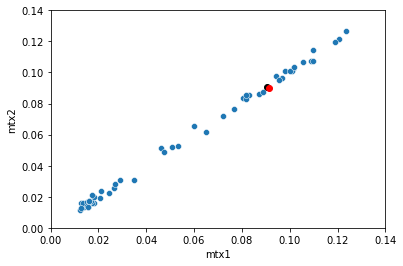

In [25]:
sns.scatterplot(data=validations_df, x='mtx1', y='mtx2')

plt.plot(get_derivative_growth_rate(('B', 2), MTX_source_df)[0], get_derivative_growth_rate(('B', 3), MTX_source_df)[0], 'ko')
plt.plot(get_derivative_growth_rate(('F', 16), MTX_source_df)[0], get_derivative_growth_rate(('F', 17), MTX_source_df)[0], 'ro')

plt.xlim(0,0.14)
plt.ylim(0,0.14)

(0.1, 0.25)

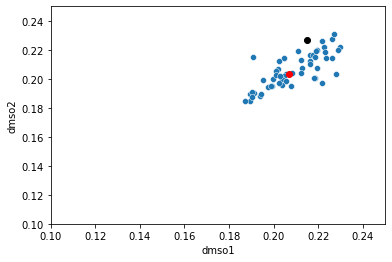

In [26]:
sns.scatterplot(data=validations_df, x='dmso1', y='dmso2')

plt.plot(get_derivative_growth_rate(('C', 2), MTX_source_df)[0], get_derivative_growth_rate(('C', 3), MTX_source_df)[0], 'ko')
plt.plot(get_derivative_growth_rate(('G', 16), MTX_source_df)[0], get_derivative_growth_rate(('G', 17), MTX_source_df)[0], 'ro')

plt.xlim(0.10,0.25)
plt.ylim(0.10,0.25)

In [27]:
def f_type(x, y, thresholds=[(0.4, 0.5), (0.5,0.5), (0.1,0.1)]):
    
    if x >=thresholds[0][0] and y<thresholds[0][1]:
        mut_type = 'Wt-like'

    elif x <thresholds[1][0] and y>=thresholds[1][1]:
        mut_type = 'Nonsense-like'

    elif x <thresholds[2][0] and y<thresholds[2][1]:
        mut_type = 'Elbow'
        
    else:
        mut_type='other'
    
    return mut_type

validations_df['mut_type'] = validations_df.apply(lambda x: f_type(x['CY_123'], x['FC_123']), axis=1)

validations_df['mut_type']

136             Elbow
168     Nonsense-like
227             Elbow
261     Nonsense-like
263             Elbow
            ...      
3233            other
3249            Elbow
3250            Elbow
3274            other
3275            other
Name: mut_type, Length: 95, dtype: object

In [28]:
colors=sns.color_palette("hls", 3)
mut_colors = {'Wt-like':colors[1], 'Nonsense-like':colors[0], 'Elbow':colors[2], 'other':'lightgrey'}

/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0.1, 0.25)

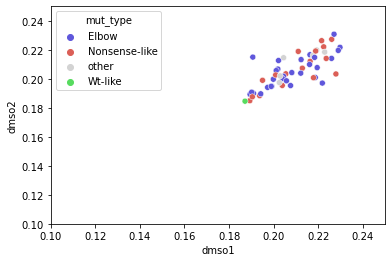

In [29]:
sns.scatterplot(data=validations_df, x='dmso1', y='dmso2', hue='mut_type',
            palette = mut_colors)

plt.xlim(0.10,0.25)
plt.ylim(0.10,0.25)

In [30]:
validations_df['mtx_average'] = (validations_df['mtx1']+validations_df['mtx2'])/2

In [31]:
validations_df['mtx_average']

136        NaN
168        NaN
227        NaN
261     0.0137
263     0.0147
         ...  
3233       NaN
3249       NaN
3250       NaN
3274       NaN
3275       NaN
Name: mtx_average, Length: 95, dtype: float64

## Haploid validations

In [32]:
plate_map_haploids = {'A1':'WT', 'A2':'B2', 'A3':'C3', 'A4':'B4', 'A5':'A5', 'A6':'H5', 'A7':'F6', 'A8':'F7', 'A9':'E8', 'A10':'C9', 'A11':'A10',
                      'B1':'B1', 'B2':'C2', 'B3':'E3', 'B4':'C4', 'B5':'B5', 'B6':'WT', 'B7':'G6', 'B8':'G7', 'B9':'F8', 'B10':'D9', 'B11':'B10',
                      'C1':'C1', 'C2':'D2', 'C3':'F3', 'C4':'D4', 'C5':'C5', 'C6':'A6', 'C7':'A7', 'C8':'H7', 'C9':'G8', 'C10':'E9', 'C11':'C10',
                      'D1':'D1', 'D2':'G2', 'D3':'G3', 'D4':'E4', 'D5':'D5', 'D6':'B6', 'D7':'B7', 'D8':'A8', 'D9':'H8', 'D10':'F9', 'D11':'D10',
                      'E1':'F1', 'E2':'H2', 'E3':'H3', 'E4':'F4', 'E5':'E5', 'E6':'C6', 'E7':'C7', 'E8':'B8', 'E9':'WT', 'E10':'G9', 'E11':'E10',
                      'F1':'G1', 'F2':'A3', 'F3':'WT', 'F4':'G4', 'F5':'F5', 'F6':'D6', 'F7':'D7', 'F8':'C8', 'F9':'A9', 'F10':'H9', 'F11':'F10',
                      'G1':'H1', 'G2':'B3', 'G3':'A4', 'G4':'H4', 'G5':'G5', 'G6':'E6', 'G7':'E7', 'G8':'D8', 'G9':'B9', 'G10':'H10', 'G11':'G10'}
inv_map_haps = {v: k for k, v in plate_map_haploids.items()}


In [33]:
inv_map_haps['H1']

'G1'

In [34]:
plate_96w_position_dict_haploids = {}


for mutant in mutant_indexes:
    
    mutant_no = mutant_indexes.index(mutant)
    
    if primer_position_dict[mutant] in plate_map_haploids.values():
        
        
        plate_96w_position_dict_haploids[mutant] = inv_map_haps[primer_position_dict[mutant]]
         
    else:
        plate_96w_position_dict_haploids[mutant] = np.nan
        
plate_96w_position_dict_haploids
#looks good based on printed values        
        
        
#for mut in mutant_indexes:
#    print(primer_position_dict[mut], plate_96w_position_dict_haploids[mut])
    # printed values match the plan in my lab notebook, looks good



        
        

{136: nan,
 261: 'B1',
 263: 'C1',
 345: 'D1',
 350: nan,
 429: 'E1',
 439: 'F1',
 455: 'G1',
 514: nan,
 575: 'A2',
 582: 'B2',
 681: 'C2',
 723: nan,
 744: nan,
 745: 'D2',
 770: 'E2',
 787: 'F2',
 788: 'G2',
 1023: 'A3',
 1161: nan,
 1170: 'B3',
 1205: 'C3',
 1206: 'D3',
 1208: 'E3',
 1213: 'G3',
 1228: 'A4',
 1236: 'B4',
 1249: 'C4',
 1333: 'D4',
 1350: 'E4',
 1410: 'F4',
 1451: 'G4',
 1460: 'A5',
 1527: 'B5',
 1551: 'C5',
 1560: 'D5',
 1563: 'E5',
 1565: 'F5',
 1568: 'G5',
 1570: 'A6',
 1642: 'C6',
 1770: 'D6',
 1778: 'E6',
 1830: 'F6',
 1854: 'G6',
 1877: 'A7',
 1897: 'B7',
 1910: nan,
 1915: 'C7',
 1921: 'D7',
 1980: 'E7',
 1983: 'F7',
 1990: 'G7',
 2004: 'A8',
 2020: 'B8',
 2189: 'C8',
 2298: 'D8',
 2434: 'E8',
 2435: 'F8',
 2445: 'G8',
 2467: 'A9',
 2534: 'B9',
 2536: 'C9',
 2628: 'D9',
 2760: 'F9',
 2900: 'G9',
 2918: 'A10',
 2936: 'B10',
 2967: 'C10',
 3092: 'D10',
 3096: 'E10',
 3118: 'F10',
 3144: 'A11',
 3147: 'B11',
 3156: 'C11',
 3208: 'D11',
 3249: 'E11',
 3250: 'F11',

In [35]:
c_neo_list = [345, 455, 575, 582, 745, 787, 788, 1023, 1410, 1527, 1770, 1778, 1830, 1854, 1877, 1915, 1921, 2298, 2445, 2467,
                 2534, 2536, 2967, 3156, 3208, 3249, 3250, 3274, 3275]

for x in c_neo_list:
    print(x,'\t' ,plate_96w_position_dict_haploids[x])

345 	 D1
455 	 G1
575 	 A2
582 	 B2
745 	 D2
787 	 F2
788 	 G2
1023 	 A3
1410 	 F4
1527 	 B5
1770 	 D6
1778 	 E6
1830 	 F6
1854 	 G6
1877 	 A7
1915 	 C7
1921 	 D7
2298 	 D8
2445 	 G8
2467 	 A9
2534 	 B9
2536 	 C9
2967 	 C10
3156 	 C11
3208 	 D11
3249 	 E11
3250 	 F11
3274 	 G11
3275 	 G10


In [36]:
FC_row_dict = {'A':'B',
                'B':'D',
                'C':'F',
                'D':'H',
                'E':'J',
                'F':'L',
                'G':'N'}
CY_row_dict = {'A':'C',
                 'B':'E',
                 'C':'G',
                 'D':'I',
                 'E':'K',
                 'F':'M',
                 'G':'O'}


In [37]:
type('A1')

str

## Add haploid CY/FC growth curve plate position in the dataframe

In [38]:


plate_384_hap_FC_1_position_dict = {}

for mutant in mutant_indexes:   
    if isinstance(plate_96w_position_dict_haploids[mutant], str) == False:
        plate_384_hap_FC_1_position_dict[mutant] = np.NaN
        
    else:
        mutant_row = plate_96w_position_dict_haploids[mutant][0]
        mutant_col = int(plate_96w_position_dict_haploids[mutant][1:])
        
        plate_384_hap_FC_1_position_dict[mutant] = FC_row_dict[mutant_row]+str((mutant_col*2))       
        
#plate_384_hap_FC_1_position_dict
#looks good

In [39]:
plate_384_hap_FC_2_position_dict = {}

for mutant in mutant_indexes:   
    if isinstance(plate_96w_position_dict_haploids[mutant], str) == False:
        plate_384_hap_FC_2_position_dict[mutant] = np.NaN
        
    else:
        mutant_row = plate_96w_position_dict_haploids[mutant][0]
        mutant_col = int(plate_96w_position_dict_haploids[mutant][1:])
        
        plate_384_hap_FC_2_position_dict[mutant] = FC_row_dict[mutant_row]+str(((mutant_col*2)+1))
#plate_384_hap_FC_2_position_dict
#looks good

In [40]:
plate_384_hap_CY_1_position_dict = {}

for mutant in mutant_indexes:   
    if isinstance(plate_96w_position_dict_haploids[mutant], str) == False:
        plate_384_hap_CY_1_position_dict[mutant] = np.NaN
        
    else:
        mutant_row = plate_96w_position_dict_haploids[mutant][0]
        mutant_col = int(plate_96w_position_dict_haploids[mutant][1:])
        
        plate_384_hap_CY_1_position_dict[mutant] = CY_row_dict[mutant_row]+str(((mutant_col*2)))
#plate_384_hap_CY_1_position_dict
#looks good

In [41]:
plate_384_hap_CY_2_position_dict = {}

for mutant in mutant_indexes:   
    if isinstance(plate_96w_position_dict_haploids[mutant], str) == False:
        plate_384_hap_CY_2_position_dict[mutant] = np.NaN
        
    else:
        mutant_row = plate_96w_position_dict_haploids[mutant][0]
        mutant_col = int(plate_96w_position_dict_haploids[mutant][1:])
        
        plate_384_hap_CY_2_position_dict[mutant] = CY_row_dict[mutant_row]+str(((mutant_col*2)+1))
#plate_384_hap_CY_2_position_dict
#looks good

In [42]:
validations_df['plate_96w_position_haploid'] = pd.Series(plate_96w_position_dict_haploids)
validations_df['fc_hap_1_position'] = pd.Series(plate_384_hap_FC_1_position_dict)
validations_df['fc_hap_2_position'] = pd.Series(plate_384_hap_FC_2_position_dict)
validations_df['cy_hap_1_position'] = pd.Series(plate_384_hap_CY_1_position_dict)
validations_df['cy_hap_2_position'] = pd.Series(plate_384_hap_CY_2_position_dict)




validations_df

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,mtx2,dmso1,dmso2,mut_type,mtx_average,plate_96w_position_haploid,fc_hap_1_position,fc_hap_2_position,cy_hap_1_position,cy_hap_2_position
136,8,S,F,-1.111151,-0.922339,0.415623,-1.299963,0.276321,-4.373589,-4.495269,...,NaN,NaN,NaN,Elbow,NaN,NaN,NaN,NaN,NaN,NaN
168,10,W,*,-0.136679,-0.322614,0.504528,0.049255,0.105939,1.184129,1.158049,...,NaN,NaN,NaN,Nonsense-like,NaN,NaN,NaN,NaN,NaN,NaN
227,12,Q,K,0.769357,1.416442,1.857860,0.122271,0.298271,-1.133104,-1.532682,...,NaN,NaN,NaN,Elbow,NaN,NaN,NaN,NaN,NaN,NaN
261,14,G,W,-3.128267,-2.879006,0.000000,-3.377528,0.000000,1.131018,1.272348,...,0.01360,0.21628,0.21208,Nonsense-like,0.0137,B1,D2,D3,E2,E3
263,14,G,Y,-4.292014,-3.590963,1.042929,-4.993065,0.434378,-1.111130,-1.142447,...,0.01552,0.20184,0.20676,Elbow,0.0147,C1,F2,F3,G2,G3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,155,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN
3249,156,I,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Elbow,NaN,E11,J22,J23,K22,K23
3250,156,I,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Elbow,NaN,F11,L22,L23,M22,M23
3274,157,G,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,other,NaN,G11,N22,N23,O22,O23


## get haploid growth rates fc/cy

In [43]:
hap_fccy_source_table = './validationsmtx3845FCCY.xlsx'

In [44]:
hap_fccy_source_df = pd.read_excel(hap_fccy_source_table, header=0, nrows=384, index_col=0)

hap_fccy_source_df.head()

,0s,900s,1800s,2699s,3599s,4499s,5399s,6299s,7199s,8099s,...,181789s,182689s,183589s,184489s,185389s,186289s,187189s,188089s,188989s,189889s
A1,0.093999,0.093836,0.093565,0.093299,0.093380,0.093251,0.093201,0.093185,0.093104,0.093073,...,0.092610,0.092871,0.092788,0.092778,0.092799,0.092769,0.092839,0.092833,0.092944,0.093085
A2,0.094874,0.094589,0.094351,0.094107,0.094149,0.094059,0.094048,0.094012,0.093942,0.093899,...,0.093704,0.093825,0.093844,0.093719,0.093741,0.093712,0.093682,0.093690,0.093638,0.093824
A3,0.096128,0.096049,0.095701,0.095448,0.095497,0.095356,0.095368,0.095280,0.095212,0.095123,...,0.094900,0.095019,0.095058,0.094953,0.095014,0.094976,0.094960,0.094911,0.094914,0.095034
A4,0.096040,0.095852,0.095531,0.095280,0.095295,0.095151,0.095198,0.095064,0.095082,0.094998,...,0.094920,0.095033,0.095014,0.094954,0.095047,0.094997,0.095000,0.094885,0.094955,0.095081
A5,0.094631,0.094482,0.094168,0.093955,0.093977,0.093889,0.093823,0.093735,0.093694,0.093612,...,0.093606,0.093738,0.093757,0.093677,0.093733,0.093672,0.093645,0.093550,0.093630,0.093706


In [45]:
rename_dict = {}


for col_name in hap_fccy_source_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
hap_fccy_source_df.rename(columns = rename_dict, inplace=True)

hap_fccy_source_df.head()

,0.000000,0.250000,0.500000,0.749722,0.999722,1.249722,1.499722,1.749722,1.999722,2.249722,...,50.496944,50.746944,50.996944,51.246944,51.496944,51.746944,51.996944,52.246944,52.496944,52.746944
A1,0.093999,0.093836,0.093565,0.093299,0.093380,0.093251,0.093201,0.093185,0.093104,0.093073,...,0.092610,0.092871,0.092788,0.092778,0.092799,0.092769,0.092839,0.092833,0.092944,0.093085
A2,0.094874,0.094589,0.094351,0.094107,0.094149,0.094059,0.094048,0.094012,0.093942,0.093899,...,0.093704,0.093825,0.093844,0.093719,0.093741,0.093712,0.093682,0.093690,0.093638,0.093824
A3,0.096128,0.096049,0.095701,0.095448,0.095497,0.095356,0.095368,0.095280,0.095212,0.095123,...,0.094900,0.095019,0.095058,0.094953,0.095014,0.094976,0.094960,0.094911,0.094914,0.095034
A4,0.096040,0.095852,0.095531,0.095280,0.095295,0.095151,0.095198,0.095064,0.095082,0.094998,...,0.094920,0.095033,0.095014,0.094954,0.095047,0.094997,0.095000,0.094885,0.094955,0.095081
A5,0.094631,0.094482,0.094168,0.093955,0.093977,0.093889,0.093823,0.093735,0.093694,0.093612,...,0.093606,0.093738,0.093757,0.093677,0.093733,0.093672,0.093645,0.093550,0.093630,0.093706


In [46]:
hap_fccy_source_df=hap_fccy_source_df.T

hap_fccy_source_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0.000000,0.093999,0.094874,0.096128,0.096040,0.094631,0.095100,0.095889,0.093355,0.096407,0.094229,...,0.094504,0.093788,0.093808,0.094550,0.094756,0.093980,0.094620,0.093618,0.093362,0.093628
0.250000,0.093836,0.094589,0.096049,0.095852,0.094482,0.095046,0.095907,0.093367,0.096491,0.094400,...,0.094541,0.094049,0.094194,0.094994,0.095173,0.094373,0.094952,0.093955,0.093812,0.094167
0.500000,0.093565,0.094351,0.095701,0.095531,0.094168,0.094749,0.095720,0.093155,0.096349,0.094107,...,0.094254,0.093754,0.093926,0.094611,0.094859,0.094093,0.094698,0.093747,0.093562,0.094155
0.749722,0.093299,0.094107,0.095448,0.095280,0.093955,0.094518,0.095568,0.092936,0.096312,0.093860,...,0.094024,0.093584,0.093761,0.094574,0.094787,0.094090,0.094702,0.093781,0.093580,0.094122
0.999722,0.093380,0.094149,0.095497,0.095295,0.093977,0.094583,0.095565,0.092986,0.096605,0.093946,...,0.093864,0.093494,0.093683,0.094470,0.094745,0.093885,0.094611,0.093694,0.093572,0.094065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51.746944,0.092769,0.093712,0.094976,0.094997,0.093672,0.094359,0.095553,0.093027,0.100140,0.093761,...,0.094124,0.093897,0.093698,0.094332,0.094803,0.094127,0.094495,0.093732,0.093519,0.093556
51.996944,0.092839,0.093682,0.094960,0.095000,0.093645,0.094379,0.095597,0.093036,0.100150,0.093761,...,0.094174,0.093977,0.093723,0.094405,0.094794,0.094069,0.094488,0.093715,0.093401,0.093411
52.246944,0.092833,0.093690,0.094911,0.094885,0.093550,0.094402,0.095596,0.093021,0.100190,0.093789,...,0.094033,0.093843,0.093592,0.094314,0.094707,0.094037,0.094383,0.093649,0.093309,0.093544
52.496944,0.092944,0.093638,0.094914,0.094955,0.093630,0.094408,0.095529,0.092952,0.100180,0.093741,...,0.094275,0.094013,0.093753,0.094467,0.094858,0.094230,0.094597,0.093884,0.093544,0.093741


In [47]:
hap_fccy_source_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       ...
       'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24'],
      dtype='object', length=384)

In [48]:
fccy_growth_rates = {}

for well in list(hap_fccy_source_df.columns):
    
    row = well[0]
    col = int(well[1:])
    
    if row not in ['A', 'P'] and col not in [1,24]:
    
        growth_rate = get_derivative_growth_rate((row, col), hap_fccy_source_df, tmax=48)
    
        fccy_growth_rates[well] = growth_rate[0]

In [49]:
hap_fc_1_growth_series = {}
hap_fc_2_growth_series = {}
hap_cy_1_growth_series = {}
hap_cy_2_growth_series = {}


for mutant in mutant_indexes:
    
    index_96 = plate_96w_position_dict_haploids[mutant]
    
    if isinstance(index_96, str) == True:
    
        index_hap_fc_1 = plate_384_hap_FC_1_position_dict[mutant]
        index_hap_fc_2 = plate_384_hap_FC_2_position_dict[mutant]

        index_hap_cy_1 = plate_384_hap_CY_1_position_dict[mutant]
        index_hap_cy_2 = plate_384_hap_CY_2_position_dict[mutant]
        
        hap_fc_1_growth_series[mutant] = fccy_growth_rates[index_hap_fc_1]
        hap_fc_2_growth_series[mutant] = fccy_growth_rates[index_hap_fc_2]
        hap_cy_1_growth_series[mutant] = fccy_growth_rates[index_hap_cy_1]
        hap_cy_2_growth_series[mutant] = fccy_growth_rates[index_hap_cy_2]
        
        
    else:
        
        hap_fc_1_growth_series[mutant] = np.nan
        hap_fc_2_growth_series[mutant] = np.nan
        hap_cy_1_growth_series[mutant] = np.nan
        hap_cy_2_growth_series[mutant] = np.nan

    
    
#sc_growth_series 
#looks good

validations_df['hap_fc_1'] = pd.Series(hap_fc_1_growth_series)
validations_df['hap_fc_2'] = pd.Series(hap_fc_2_growth_series)
validations_df['hap_cy_1'] = pd.Series(hap_cy_1_growth_series)
validations_df['hap_cy_2'] = pd.Series(hap_cy_2_growth_series)


In [50]:
validations_df['hap_fc_average'] = (validations_df['hap_fc_1']+validations_df['hap_fc_2'])/2
validations_df['hap_cy_average'] = (validations_df['hap_cy_1']+validations_df['hap_cy_2'])/2

In [51]:
validations_df['hap_fc_average'] = (validations_df['hap_fc_1']+validations_df['hap_fc_2'])/2
validations_df['hap_cy_average'] = (validations_df['hap_cy_1']+validations_df['hap_cy_2'])/2


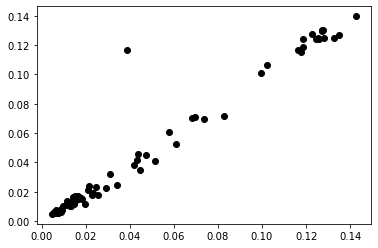

In [52]:
plt.scatter(validations_df['hap_cy_1'], validations_df['hap_cy_2'], color='k')

In [53]:
(validations_df['hap_cy_1']-validations_df['hap_cy_2']).nsmallest(3)

1770   -0.0776
3118   -0.0060
1451   -0.0048
dtype: float64

In [54]:
validations_df.loc[1770]['cy_hap_2_position']

'I13'

In [55]:
#validations_df.loc[1770]
# is outlier, caused by problem with plate. will exclude from analysis

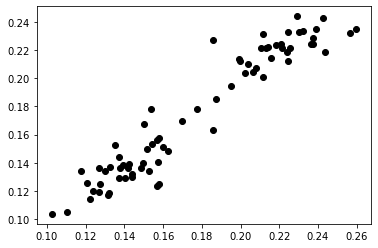

In [56]:
plt.scatter(validations_df['hap_fc_1'], validations_df['hap_fc_2'], color='k')

In [57]:
outliers_list = [1770]

In [58]:
plot_df = validations_df.loc[[x for x in list(validations_df.index) if x not in outliers_list]] 

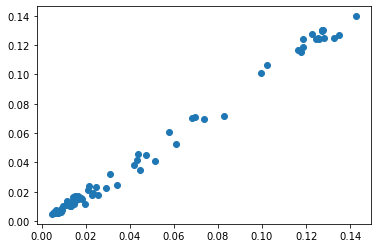

In [59]:
plt.scatter(plot_df['hap_cy_1'], plot_df['hap_cy_2'])

In [60]:
validations_df['dmso_average'] = (validations_df['dmso1'] + validations_df['dmso2'])/2

In [61]:
validations_df['mtx_average']

136        NaN
168        NaN
227        NaN
261     0.0137
263     0.0147
         ...  
3233       NaN
3249       NaN
3250       NaN
3274       NaN
3275       NaN
Name: mtx_average, Length: 95, dtype: float64

In [62]:
validations_df.to_csv('validations_table_v3.csv', columns=['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2', 'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1', 'hap_cy_2', 'hap_fc_average', 'hap_cy_average'], sep=',')

In [63]:
second_batch_outliers = [168, 227, 416, 418, 567, 574, 578, 583, 645, 766, 773, 1391, 1678, 1876, 3233]


In [64]:
outliers_plate_map_R1 = {'A1':168, 'A2':645,  'A3':455,  'A4':3275,
                         'B1':227, 'B2':766,  'B3':575,  'B4':1410,
                         'C1':416, 'C2':773,  'C3':582,  'C4':1830,
                         'D1':418, 'D2':1391, 'D3':745,  'D4':1854,
                         'E1':567, 'E2':1678, 'E3':770,  'E4':1915,
                         'F1':574, 'F2':1876, 'F3':1023, 'F4':2445,
                         'G1':578, 'G2':3233, 'G3':1778, 'G4':2967,
                         'H1':583, 'H2':439,  'H3':3118, 'H4':3208 }


outliers_plate_map_R2 = {}
outliers_plate_map_R3 = {}


for key in list(outliers_plate_map_R1.keys()):
    
    row = key[0]
    col = int(key[1:])
    
    variant = outliers_plate_map_R1[key]
    
    R2_col = col+4
    outliers_plate_map_R2[(row+str(R2_col))] = variant
    
    R3_col = col+8
    outliers_plate_map_R3[(row+str(R3_col))] = variant

outliers_plate_map_R2

{'A5': 168,
 'A6': 645,
 'A7': 455,
 'A8': 3275,
 'B5': 227,
 'B6': 766,
 'B7': 575,
 'B8': 1410,
 'C5': 416,
 'C6': 773,
 'C7': 582,
 'C8': 1830,
 'D5': 418,
 'D6': 1391,
 'D7': 745,
 'D8': 1854,
 'E5': 567,
 'E6': 1678,
 'E7': 770,
 'E8': 1915,
 'F5': 574,
 'F6': 1876,
 'F7': 1023,
 'F8': 2445,
 'G5': 578,
 'G6': 3233,
 'G7': 1778,
 'G8': 2967,
 'H5': 583,
 'H6': 439,
 'H7': 3118,
 'H8': 3208}

In [65]:
FC_outlierv2_table = './outliersv3_FC.xlsx'

In [66]:
FC_outlierv2_df = pd.read_excel(FC_outlierv2_table, header=0, nrows=96, index_col=0)

FC_outlierv2_df.head()

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,172822s,173722s,174622s,175522s,176422s,177323s,178223s,179123s,180023s,180923s
A1,0.092275,0.092475,0.093025,0.093325,0.093800,0.094100,0.094725,0.09580,0.097325,0.098900,...,0.94917,0.94875,0.94883,0.94830,0.94865,0.94865,0.94862,0.94842,0.94952,0.94925
A2,0.092325,0.094425,0.094700,0.094600,0.094600,0.094975,0.095700,0.09675,0.098125,0.099825,...,0.97490,0.97483,0.97473,0.97460,0.97507,0.97488,0.97457,0.97515,0.97580,0.97565
A3,0.092775,0.093525,0.093675,0.093800,0.094175,0.094675,0.095275,0.09600,0.096850,0.097800,...,0.93900,0.93885,0.93870,0.93847,0.93877,0.93870,0.93837,0.93845,0.93872,0.93845
A4,0.093150,0.094300,0.095050,0.095875,0.096375,0.097200,0.098425,0.10002,0.102200,0.104500,...,0.98752,0.98778,0.98788,0.98740,0.98840,0.98860,0.98805,0.98875,0.98898,0.98880
A5,0.090700,0.093100,0.093225,0.093025,0.093150,0.093800,0.094750,0.09605,0.097575,0.099450,...,0.98072,0.98040,0.98072,0.97995,0.98072,0.98102,0.98000,0.98072,0.98090,0.98057


In [67]:
rename_dict = {}


for col_name in FC_outlierv2_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
FC_outlierv2_df.rename(columns = rename_dict, inplace=True)

FC_outlierv2_df.head()

,0.000000,0.250000,0.500000,0.750000,1.000000,1.250278,1.500278,1.750278,2.000278,2.250278,...,48.006111,48.256111,48.506111,48.756111,49.006111,49.256389,49.506389,49.756389,50.006389,50.256389
A1,0.092275,0.092475,0.093025,0.093325,0.093800,0.094100,0.094725,0.09580,0.097325,0.098900,...,0.94917,0.94875,0.94883,0.94830,0.94865,0.94865,0.94862,0.94842,0.94952,0.94925
A2,0.092325,0.094425,0.094700,0.094600,0.094600,0.094975,0.095700,0.09675,0.098125,0.099825,...,0.97490,0.97483,0.97473,0.97460,0.97507,0.97488,0.97457,0.97515,0.97580,0.97565
A3,0.092775,0.093525,0.093675,0.093800,0.094175,0.094675,0.095275,0.09600,0.096850,0.097800,...,0.93900,0.93885,0.93870,0.93847,0.93877,0.93870,0.93837,0.93845,0.93872,0.93845
A4,0.093150,0.094300,0.095050,0.095875,0.096375,0.097200,0.098425,0.10002,0.102200,0.104500,...,0.98752,0.98778,0.98788,0.98740,0.98840,0.98860,0.98805,0.98875,0.98898,0.98880
A5,0.090700,0.093100,0.093225,0.093025,0.093150,0.093800,0.094750,0.09605,0.097575,0.099450,...,0.98072,0.98040,0.98072,0.97995,0.98072,0.98102,0.98000,0.98072,0.98090,0.98057


In [68]:
FC_outlierv2_df=FC_outlierv2_df.T
FC_outlierv2_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0.000000,0.092275,0.092325,0.092775,0.093150,0.090700,0.094700,0.09220,0.090425,0.091525,0.090825,...,0.089650,0.098825,0.096250,0.09760,0.087500,0.095875,0.094725,0.094825,0.085975,0.095075
0.250000,0.092475,0.094425,0.093525,0.094300,0.093100,0.096525,0.09290,0.092175,0.092750,0.093150,...,0.091525,0.100500,0.098775,0.09910,0.089825,0.098875,0.097125,0.098675,0.087475,0.097100
0.500000,0.093025,0.094700,0.093675,0.095050,0.093225,0.096900,0.09280,0.092525,0.092375,0.093450,...,0.092475,0.100200,0.098875,0.09850,0.090000,0.099750,0.097000,0.101150,0.087450,0.097375
0.750000,0.093325,0.094600,0.093800,0.095875,0.093025,0.096850,0.09345,0.093000,0.092075,0.093425,...,0.092800,0.100200,0.098775,0.09830,0.089850,0.101200,0.098050,0.101370,0.087250,0.097800
1.000000,0.093800,0.094600,0.094175,0.096375,0.093150,0.096750,0.09370,0.093375,0.092275,0.093650,...,0.093000,0.101000,0.099475,0.09885,0.090200,0.102180,0.099075,0.102250,0.087275,0.098500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.256389,0.948650,0.974880,0.938700,0.988600,0.981020,0.975700,0.92990,0.991850,0.982750,1.002100,...,0.957100,0.966370,0.964220,0.99720,0.942120,0.976330,0.963570,1.008000,0.947950,0.969800
49.506389,0.948620,0.974570,0.938370,0.988050,0.980000,0.974950,0.92915,0.991820,0.982380,1.001900,...,0.957030,0.966030,0.964050,0.99715,0.942420,0.976300,0.963250,1.008000,0.947930,0.969320
49.756389,0.948420,0.975150,0.938450,0.988750,0.980720,0.974650,0.92930,0.991950,0.982800,1.002400,...,0.957070,0.966280,0.964670,0.99738,0.942300,0.976370,0.963420,1.007800,0.947350,0.969130
50.006389,0.949520,0.975800,0.938720,0.988980,0.980900,0.975670,0.92965,0.992520,0.982900,1.002700,...,0.957570,0.966550,0.964780,0.99815,0.942750,0.976630,0.963650,1.008500,0.947730,0.969450


In [69]:
FC_R1_dict = {}
FC_R2_dict = {}
FC_R3_dict = {}


for well in list(FC_outlierv2_df.columns):
    
    row = well[0]
    col = int(well[1:])

    growth_rate = get_derivative_growth_rate((row, col), FC_outlierv2_df, tmax=48)
    
    if col in [1,2,3,4]:
        mutant = outliers_plate_map_R1[well]
        FC_R1_dict[mutant] = growth_rate[0]
        
    elif col in [5,6,7,8]:
        mutant = outliers_plate_map_R2[well]
        FC_R2_dict[mutant] = growth_rate[0]
        
    else:
        mutant = outliers_plate_map_R3[well]
        FC_R3_dict[mutant] = growth_rate[0]

In [70]:
FC_R2_dict

{168: 0.11216000000000026,
 645: 0.11163999999999996,
 455: 0.04844000000000004,
 3275: 0.11047999999999991,
 227: 0.04899999999999993,
 766: 0.11339999999999995,
 575: 0.11439999999999984,
 1410: 0.09972000000000003,
 416: 0.11431999999999998,
 773: 0.11451999999999996,
 582: 0.05591999999999997,
 1830: 0.0505199999999999,
 418: 0.11007999999999996,
 1391: 0.049880000000000146,
 745: 0.10828000000000015,
 1854: 0.09379999999999988,
 567: 0.11399999999999988,
 1678: 0.04811999999999994,
 770: 0.11407999999999996,
 1915: 0.05339999999999989,
 574: 0.06303999999999998,
 1876: 0.04919999999999991,
 1023: 0.11396000000000006,
 2445: 0.11448000000000014,
 578: 0.07431999999999994,
 3233: 0.10036,
 1778: 0.10939999999999994,
 2967: 0.04952000000000001,
 583: 0.053279999999999994,
 439: 0.11279999999999979,
 3118: 0.04812000000000016,
 3208: 0.05903999999999998}

In [71]:
CY_outlierv2_table = './outliersv3_CY.xlsx'

In [72]:
CY_outlierv2_df = pd.read_excel(CY_outlierv2_table, header=0, nrows=96, index_col=0)

CY_outlierv2_df.head()

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,173723s,174623s,175523s,176423s,177323s,178223s,179123s,180024s,180924s,181824s
A1,0.091075,0.091625,0.091975,0.091850,0.091950,0.092425,0.092750,0.093150,0.093525,0.094125,...,0.13067,0.13053,0.13060,0.13078,0.13090,0.13095,0.13127,0.13133,0.13103,0.13143
A2,0.094125,0.094875,0.095350,0.095450,0.095800,0.096175,0.096575,0.097075,0.097600,0.098175,...,0.13822,0.13835,0.13835,0.13840,0.13847,0.13885,0.13870,0.13873,0.13900,0.13910
A3,0.092725,0.093550,0.093625,0.093475,0.093950,0.094575,0.095375,0.096350,0.097650,0.098975,...,0.90500,0.90553,0.90600,0.90630,0.90635,0.90687,0.90695,0.90705,0.90748,0.90785
A4,0.092500,0.093175,0.093425,0.093925,0.094225,0.094850,0.095150,0.095700,0.096350,0.097000,...,0.13880,0.13895,0.13900,0.13930,0.13930,0.13945,0.13953,0.13942,0.13982,0.13993
A5,0.092675,0.093325,0.093300,0.092900,0.093025,0.093500,0.093725,0.094125,0.094575,0.094975,...,0.13085,0.13100,0.13105,0.13115,0.13127,0.13122,0.13130,0.13138,0.13160,0.13187


In [73]:
rename_dict = {}


for col_name in CY_outlierv2_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
CY_outlierv2_df.rename(columns = rename_dict, inplace=True)

CY_outlierv2_df.head()

,0.000000,0.250000,0.500000,0.750000,1.000000,1.250278,1.500278,1.750278,2.000278,2.250278,...,48.256389,48.506389,48.756389,49.006389,49.256389,49.506389,49.756389,50.006667,50.256667,50.506667
A1,0.091075,0.091625,0.091975,0.091850,0.091950,0.092425,0.092750,0.093150,0.093525,0.094125,...,0.13067,0.13053,0.13060,0.13078,0.13090,0.13095,0.13127,0.13133,0.13103,0.13143
A2,0.094125,0.094875,0.095350,0.095450,0.095800,0.096175,0.096575,0.097075,0.097600,0.098175,...,0.13822,0.13835,0.13835,0.13840,0.13847,0.13885,0.13870,0.13873,0.13900,0.13910
A3,0.092725,0.093550,0.093625,0.093475,0.093950,0.094575,0.095375,0.096350,0.097650,0.098975,...,0.90500,0.90553,0.90600,0.90630,0.90635,0.90687,0.90695,0.90705,0.90748,0.90785
A4,0.092500,0.093175,0.093425,0.093925,0.094225,0.094850,0.095150,0.095700,0.096350,0.097000,...,0.13880,0.13895,0.13900,0.13930,0.13930,0.13945,0.13953,0.13942,0.13982,0.13993
A5,0.092675,0.093325,0.093300,0.092900,0.093025,0.093500,0.093725,0.094125,0.094575,0.094975,...,0.13085,0.13100,0.13105,0.13115,0.13127,0.13122,0.13130,0.13138,0.13160,0.13187


In [74]:
CY_outlierv2_df=CY_outlierv2_df.T
CY_outlierv2_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0.000000,0.091075,0.094125,0.092725,0.092500,0.092675,0.093950,0.092425,0.093675,0.094125,0.095450,...,0.087800,0.095400,0.094050,0.095950,0.086550,0.095125,0.094500,0.096475,0.086025,0.09520
0.250000,0.091625,0.094875,0.093550,0.093175,0.093325,0.095525,0.093325,0.094875,0.095050,0.096500,...,0.089000,0.096675,0.095200,0.097325,0.087775,0.096950,0.095550,0.097300,0.087100,0.09690
0.500000,0.091975,0.095350,0.093625,0.093425,0.093300,0.095025,0.093350,0.095000,0.094925,0.096050,...,0.088875,0.096700,0.094500,0.096550,0.087525,0.096975,0.094825,0.096825,0.087100,0.09720
0.750000,0.091850,0.095450,0.093475,0.093925,0.092900,0.095025,0.092850,0.095400,0.094700,0.095725,...,0.088850,0.096675,0.093925,0.096250,0.087475,0.097375,0.094500,0.096725,0.087025,0.09785
1.000000,0.091950,0.095800,0.093950,0.094225,0.093025,0.095475,0.093125,0.095925,0.094825,0.095925,...,0.088900,0.097350,0.094100,0.096425,0.087700,0.098100,0.094600,0.096950,0.087125,0.09850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.506389,0.130950,0.138850,0.906870,0.139450,0.131220,0.135980,0.901650,0.142930,0.136000,0.138220,...,0.882150,0.265800,0.878850,0.141800,0.877500,0.265650,0.875670,0.146550,0.883700,0.27075
49.756389,0.131270,0.138700,0.906950,0.139530,0.131300,0.135900,0.901800,0.142880,0.136150,0.138080,...,0.882770,0.266820,0.879900,0.141950,0.878000,0.266170,0.876100,0.147150,0.884380,0.27150
50.006667,0.131330,0.138730,0.907050,0.139420,0.131380,0.136050,0.901970,0.143080,0.136230,0.137970,...,0.883250,0.267600,0.880730,0.142500,0.878600,0.267580,0.877270,0.147820,0.884580,0.27263
50.256667,0.131030,0.139000,0.907480,0.139820,0.131600,0.136300,0.902050,0.143200,0.136330,0.138250,...,0.883620,0.267970,0.881430,0.141900,0.879000,0.267120,0.877600,0.147050,0.885050,0.27270


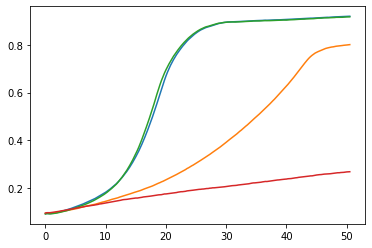

In [75]:
plt.plot(CY_outlierv2_df['C4'])
plt.plot(CY_outlierv2_df['E4'])
plt.plot(CY_outlierv2_df['G4'])
plt.plot(CY_outlierv2_df['H4'])

In [76]:
CY_R1_dict = {}
CY_R2_dict = {}
CY_R3_dict = {}


for well in list(CY_outlierv2_df.columns):
    
    row = well[0]
    col = int(well[1:])

    growth_rate = get_derivative_growth_rate((row, col), CY_outlierv2_df, tmax=48)
    
    if col in [1,2,3,4]:
        mutant = outliers_plate_map_R1[well]
        CY_R1_dict[mutant] = growth_rate[0]
        
    elif col in [5,6,7,8]:
        mutant = outliers_plate_map_R2[well]
        CY_R2_dict[mutant] = growth_rate[0]
        
    else:
        mutant = outliers_plate_map_R3[well]
        CY_R3_dict[mutant] = growth_rate[0]

In [77]:
CY_R1_dict

{168: 0.0025200000000000222,
 645: 0.0028799999999999937,
 455: 0.07891999999999966,
 3275: 0.0028000000000000247,
 227: 0.08607999999999993,
 766: 0.003599999999999992,
 575: 0.0030999999999999917,
 1410: 0.0031999999999999806,
 416: 0.0033999999999999586,
 773: 0.0034800000000000386,
 582: 0.04492000000000029,
 1830: 0.07859999999999978,
 418: 0.003920000000000035,
 1391: 0.08148,
 745: 0.0036800000000000166,
 1854: 0.003720000000000001,
 567: 0.0032799999999999496,
 1678: 0.07999999999999963,
 770: 0.0036800000000000166,
 1915: 0.03332000000000024,
 574: 0.010999999999999899,
 1876: 0.0798000000000001,
 1023: 0.0038000000000000256,
 2445: 0.003599999999999992,
 578: 0.006500000000000006,
 3233: 0.0050000000000000044,
 1778: 0.0041199999999999015,
 2967: 0.08036000000000021,
 583: 0.06040000000000001,
 439: 0.004200000000000037,
 3118: 0.07767999999999997,
 3208: 0.006759999999999988}

In [78]:
FC_R1_series = pd.Series(FC_R1_dict, name='FC_out_R1')
FC_R2_series = pd.Series(FC_R2_dict, name='FC_out_R2')
FC_R3_series = pd.Series(FC_R3_dict, name='FC_out_R3')

CY_R1_series = pd.Series(CY_R1_dict, name='CY_out_R1')
CY_R2_series = pd.Series(CY_R2_dict, name='CY_out_R2')
CY_R3_series = pd.Series(CY_R3_dict, name='CY_out_R3')

In [79]:
out_df = pd.DataFrame([FC_R1_series, FC_R2_series, FC_R3_series, CY_R1_series, CY_R2_series, CY_R3_series]).T

In [80]:
out_df

,FC_out_R1,FC_out_R2,FC_out_R3,CY_out_R1,CY_out_R2,CY_out_R3
168,0.11012,0.11216,0.11232,0.00252,0.00240,0.00272
645,0.11008,0.11164,0.11532,0.00288,0.00268,0.00248
455,0.04868,0.04844,0.04852,0.07892,0.07960,0.08128
3275,0.11084,0.11048,0.11092,0.00280,0.00292,0.00348
227,0.04860,0.04900,0.05000,0.08608,0.08560,0.08852
766,0.11208,0.11340,0.11460,0.00360,0.00330,0.00388
575,0.11288,0.11440,0.11556,0.00310,0.00290,0.00360
1410,0.09552,0.09972,0.09920,0.00320,0.00360,0.00420
416,0.11220,0.11432,0.11552,0.00340,0.00340,0.00320
773,0.11252,0.11452,0.11660,0.00348,0.00320,0.00320


FC_out_R1 FC_out_R1 SpearmanrResult(correlation=1.0, pvalue=0.0)
FC_out_R1 FC_out_R2 SpearmanrResult(correlation=0.9670087976539589, pvalue=2.2722708902448884e-19)
FC_out_R1 FC_out_R3 SpearmanrResult(correlation=0.9166895831736401, pvalue=1.7529147581194088e-13)
FC_out_R1 CY_out_R1 SpearmanrResult(correlation=-0.8126489595759148, pvalue=1.6131329733983397e-08)
FC_out_R1 CY_out_R2 SpearmanrResult(correlation=-0.8470351057479287, pvalue=9.832505800416814e-10)
FC_out_R1 CY_out_R3 SpearmanrResult(correlation=-0.8232167026125642, pvalue=7.281058182649505e-09)
FC_out_R2 FC_out_R1 SpearmanrResult(correlation=0.9670087976539589, pvalue=2.2722708902448884e-19)
FC_out_R2 FC_out_R2 SpearmanrResult(correlation=1.0, pvalue=0.0)
FC_out_R2 FC_out_R3 SpearmanrResult(correlation=0.9744294789344273, pvalue=5.22407944996434e-21)
FC_out_R2 CY_out_R1 SpearmanrResult(correlation=-0.8509624340968637, pvalue=6.842531886042174e-10)
FC_out_R2 CY_out_R2 SpearmanrResult(correlation=-0.8536339509777329, pvalue=5.3

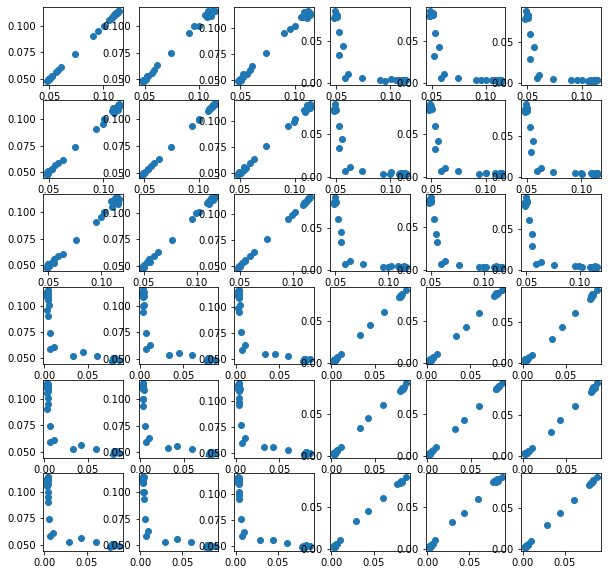

In [81]:
plt.figure(figsize=(10,10))


index=1

for column1 in out_df.columns:
    
    for column2 in out_df.columns:
        print(column1, column2, stats.spearmanr(out_df[column1], out_df[column2]))
        plt.subplot(6,6,index)
        plt.scatter(out_df[column1], out_df[column2])
        index+=1

In [82]:
out_df['FC_out_average'] = (out_df['FC_out_R1'] + out_df['FC_out_R2'] + out_df['FC_out_R3'])/3
out_df['CY_out_average'] = (out_df['CY_out_R1'] + out_df['CY_out_R2'] + out_df['CY_out_R3'])/3

(0.0, 0.1)

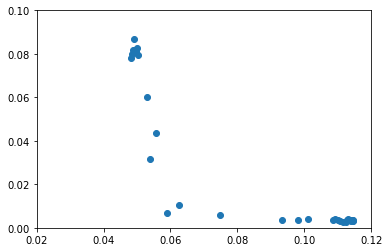

In [83]:
plt.scatter(out_df['FC_out_average'], out_df['CY_out_average'])
plt.xlim(0.02, 0.12)
plt.ylim(0, 0.10)

In [84]:
out_df['hap_cy'] = validations_df['hap_cy_average']
out_df['hap_fc'] = validations_df['hap_fc_average']
out_df

,FC_out_R1,FC_out_R2,FC_out_R3,CY_out_R1,CY_out_R2,CY_out_R3,FC_out_average,CY_out_average,hap_cy,hap_fc
168,0.11012,0.11216,0.11232,0.00252,0.00240,0.00272,0.111533,0.002547,NaN,NaN
645,0.11008,0.11164,0.11532,0.00288,0.00268,0.00248,0.112347,0.002680,NaN,NaN
455,0.04868,0.04844,0.04852,0.07892,0.07960,0.08128,0.048547,0.079933,0.12496,0.10310
3275,0.11084,0.11048,0.11092,0.00280,0.00292,0.00348,0.110747,0.003067,0.01578,0.20662
227,0.04860,0.04900,0.05000,0.08608,0.08560,0.08852,0.049200,0.086733,NaN,NaN
766,0.11208,0.11340,0.11460,0.00360,0.00330,0.00388,0.113360,0.003593,NaN,NaN
575,0.11288,0.11440,0.11556,0.00310,0.00290,0.00360,0.114280,0.003200,0.01524,0.21842
1410,0.09552,0.09972,0.09920,0.00320,0.00360,0.00420,0.098147,0.003667,0.01450,0.20546
416,0.11220,0.11432,0.11552,0.00340,0.00340,0.00320,0.114013,0.003333,NaN,NaN
773,0.11252,0.11452,0.11660,0.00348,0.00320,0.00320,0.114547,0.003293,NaN,NaN


SpearmanrResult(correlation=0.8627450980392157, pvalue=8.317125318327623e-06)

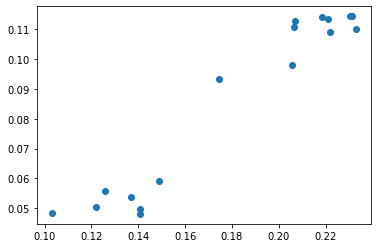

In [85]:
plt.scatter(out_df['hap_fc'], out_df['FC_out_average'])
stats.spearmanr(out_df['hap_fc'], out_df['FC_out_average'], nan_policy='omit')

SpearmanrResult(correlation=0.7720588235294118, pvalue=0.00028201264704692656)

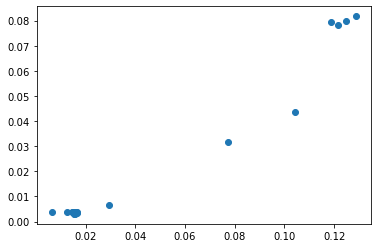

In [86]:
plt.scatter(out_df['hap_cy'], out_df['CY_out_average'])
stats.spearmanr(out_df['hap_cy'], out_df['CY_out_average'], nan_policy='omit')

In [87]:
mask = ~np.isnan(out_df['FC_out_average']) & ~np.isnan(out_df['hap_fc'])

slope, intercept, r_value, p_value, std_err = stats.linregress(out_df['FC_out_average'][mask], y=out_df['hap_fc'][mask])

out_df['adjusted_2nd_batch_FC'] = (out_df['FC_out_average']*slope)+intercept

In [88]:
mask = ~np.isnan(out_df['CY_out_average']) & ~np.isnan(out_df['hap_cy'])

slope, intercept, r_value, p_value, std_err = stats.linregress(out_df['CY_out_average'][mask], y=out_df['hap_cy'][mask])

out_df['adjusted_2nd_batch_CY'] = (out_df['CY_out_average']*slope)+intercept

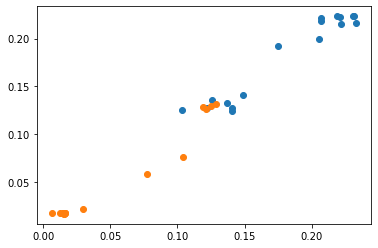

In [89]:
plt.scatter(out_df['hap_fc'], out_df['adjusted_2nd_batch_FC'])
plt.scatter(out_df['hap_cy'], out_df['adjusted_2nd_batch_CY'])


In [90]:
out_df

,FC_out_R1,FC_out_R2,FC_out_R3,CY_out_R1,CY_out_R2,CY_out_R3,FC_out_average,CY_out_average,hap_cy,hap_fc,adjusted_2nd_batch_FC,adjusted_2nd_batch_CY
168,0.11012,0.11216,0.11232,0.00252,0.00240,0.00272,0.111533,0.002547,NaN,NaN,0.219011,0.016087
645,0.11008,0.11164,0.11532,0.00288,0.00268,0.00248,0.112347,0.002680,NaN,NaN,0.220223,0.016281
455,0.04868,0.04844,0.04852,0.07892,0.07960,0.08128,0.048547,0.079933,0.12496,0.10310,0.125171,0.129166
3275,0.11084,0.11048,0.11092,0.00280,0.00292,0.00348,0.110747,0.003067,0.01578,0.20662,0.217839,0.016846
227,0.04860,0.04900,0.05000,0.08608,0.08560,0.08852,0.049200,0.086733,NaN,NaN,0.126145,0.139102
766,0.11208,0.11340,0.11460,0.00360,0.00330,0.00388,0.113360,0.003593,NaN,NaN,0.221732,0.017616
575,0.11288,0.11440,0.11556,0.00310,0.00290,0.00360,0.114280,0.003200,0.01524,0.21842,0.223103,0.017041
1410,0.09552,0.09972,0.09920,0.00320,0.00360,0.00420,0.098147,0.003667,0.01450,0.20546,0.199067,0.017723
416,0.11220,0.11432,0.11552,0.00340,0.00340,0.00320,0.114013,0.003333,NaN,NaN,0.222706,0.017236
773,0.11252,0.11452,0.11660,0.00348,0.00320,0.00320,0.114547,0.003293,NaN,NaN,0.223500,0.017178


In [91]:
validations_df['2nd_batch_FC'] = out_df['FC_out_average']
validations_df['2nd_batch_CY'] = out_df['CY_out_average']

validations_df['adjusted_2nd_batch_FC'] = out_df['adjusted_2nd_batch_FC']
validations_df['adjusted_2nd_batch_CY'] = out_df['adjusted_2nd_batch_CY']

In [92]:
validations_df['combined_hap_fc']  = validations_df[[ 'hap_fc_average', 'adjusted_2nd_batch_FC']].mean(axis=1)
validations_df['combined_hap_cy']  = validations_df[[ 'hap_cy_average', 'adjusted_2nd_batch_CY']].mean(axis=1)


In [93]:
validations_df.loc[1770]

codon                         86
wt                             T
measured                       M
CY_1                         NaN
CY_1_R1                      NaN
                          ...   
2nd_batch_CY                 NaN
adjusted_2nd_batch_FC        NaN
adjusted_2nd_batch_CY        NaN
combined_hap_fc          0.16594
combined_hap_cy          0.07756
Name: 1770, Length: 87, dtype: object

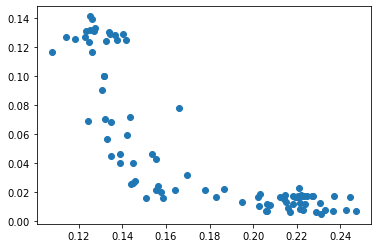

In [94]:
plt.scatter(validations_df['combined_hap_fc'], validations_df['combined_hap_cy'])

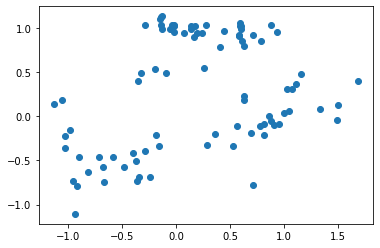

In [100]:
plt.scatter(validations_df['CY_score'], validations_df["FC_score"])

In [101]:
outliers_first_round = [439, 455, 514, 575, 582, 723, 744, 745, 770, 1023, 1778, 3118, 3275]
second_round_outliers = [168, 227, 416, 418, 567, 574, 578, 583, 645, 766, 773, 1391, 1678, 1876, 3233]

escape_outlier_dict = {}

for index in list(validations_df.index):
    
    if validations_df.loc[index]['CY_score'] >0.35 and validations_df.loc[index]['FC_score'] >0.1:
        escape_outlier_dict[index] = 'Yes'
        
    else:
        
        escape_outlier_dict[index] = 'No'
        
validations_df['escape_outlier'] = pd.Series(escape_outlier_dict)

In [102]:
validations_df.at[1770, 'combined_hap_cy'] =np.nan

In [106]:
validations_df.to_csv('validations_table_v4.csv', columns=['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2', 'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1', 'hap_cy_2', 'hap_fc_average', 'hap_cy_average', '2nd_batch_FC', '2nd_batch_CY','adjusted_2nd_batch_FC',	'adjusted_2nd_batch_CY', 'combined_hap_fc',	'combined_hap_cy', 'escape_outlier'], sep=',')

In [104]:
validations_df

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,hap_fc_average,hap_cy_average,dmso_average,2nd_batch_FC,2nd_batch_CY,adjusted_2nd_batch_FC,adjusted_2nd_batch_CY,combined_hap_fc,combined_hap_cy,escape_outlier
136,8,S,F,-1.111151,-0.922339,0.415623,-1.299963,0.276321,-4.373589,-4.495269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
168,10,W,*,-0.136679,-0.322614,0.504528,0.049255,0.105939,1.184129,1.158049,...,NaN,NaN,NaN,0.111533,0.002547,0.219011,0.016087,0.219011,0.016087,Yes
227,12,Q,K,0.769357,1.416442,1.857860,0.122271,0.298271,-1.133104,-1.532682,...,NaN,NaN,NaN,0.049200,0.086733,0.126145,0.139102,0.126145,0.139102,Yes
261,14,G,W,-3.128267,-2.879006,0.000000,-3.377528,0.000000,1.131018,1.272348,...,0.20750,0.01094,0.21418,NaN,NaN,NaN,NaN,0.207500,0.010940,No
263,14,G,Y,-4.292014,-3.590963,1.042929,-4.993065,0.434378,-1.111130,-1.142447,...,0.16960,0.03144,0.20430,NaN,NaN,NaN,NaN,0.169600,0.031440,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,155,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.100987,0.004160,0.203298,0.018444,0.203298,0.018444,Yes
3249,156,I,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.15884,0.01588,NaN,NaN,NaN,NaN,NaN,0.158840,0.015880,No
3250,156,I,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.15546,0.02130,NaN,NaN,NaN,NaN,NaN,0.155460,0.021300,No
3274,157,G,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.20648,0.01174,NaN,NaN,NaN,NaN,NaN,0.206480,0.011740,Yes
